In [1]:
import cv2
import rawpy
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
import glob

raws = []
rpyraws = []
for i in sorted(glob.glob("../photos/positives/Norfolk & Cricket 1977/*.NEF"))[:3]:
    print(i)
    raw = rawpy.imread(i)
    rpyraws.append(raw)
    # imcopy = raw.raw_image_visible.copy()
    pog = cv2.cvtColor(cv2.demosaicing(raw.raw_image_visible, cv2.COLOR_BayerRG2RGB), cv2.COLOR_BGR2RGB)
    pog = pog/pog.max()
    # pog = np.concatenate((
    #     convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    # ), axis=2)
    
    raws.append(pog)
raws=np.asarray(raws)
raw

../photos/positives/Norfolk & Cricket 1977/DSC_0095.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0096.NEF
../photos/positives/Norfolk & Cricket 1977/DSC_0097.NEF


In [3]:
(raws[0]**(1/2.4)*1.3)[3000:3500, 300:1000].mean((0,1))

array([0.15822841, 0.241396  , 0.18370541])

In [4]:
(raws[0]**(1/2.4)*1.3)[500:1000, 300:1000].mean((0,1))

array([0.41450807, 0.64731636, 0.64904639])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


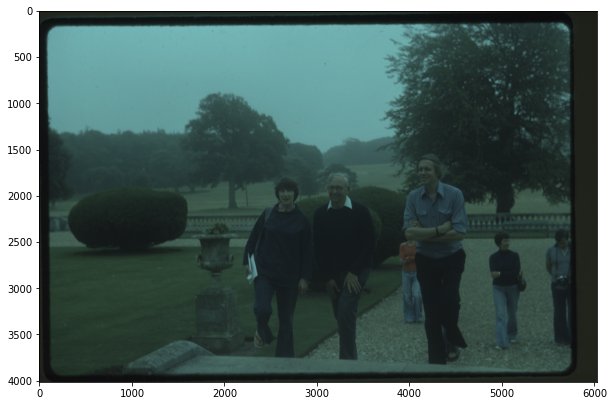

In [5]:

import matplotlib.pyplot as plt
plt.imshow(raws[0]**(1/2.4)*1.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


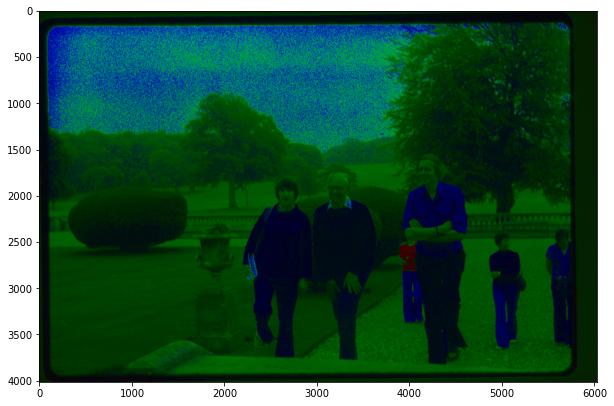

In [6]:
plt.imshow(
    cv2.cvtColor(
        (
            cv2.cvtColor(
                (raws[0]**(1/2.4)*1.3).clip(0,1).astype(np.float32),
                cv2.COLOR_RGB2HSV
            ) * [1, 100, 1]
        ).astype(np.float32),
        cv2.COLOR_HSV2RGB
    )
)

In [7]:
cv2.cvtColor(
    (raws[0]**(1/2.4)*1.3).clip(0,1).astype(np.float32),
    cv2.COLOR_RGB2HSV
) * [1, 100, 1]
        

array([[[101.25067902,  16.4305985 ,   0.14155766],
        [101.25067902,  16.4305985 ,   0.14155766],
        [ 80.49104309,  19.17176098,   0.14155766],
        ...,
        [ 79.00540161,  10.35549492,   0.11829887],
        [ 30.87622643,   8.02125782,   0.11034463],
        [ 30.87622643,   8.02125782,   0.11034463]],

       [[101.25067902,  16.4305985 ,   0.14155766],
        [101.25067902,  16.4305985 ,   0.14155766],
        [ 80.49104309,  19.17176098,   0.14155766],
        ...,
        [ 79.00540161,  10.35549492,   0.11829887],
        [ 30.87622643,   8.02125782,   0.11034463],
        [ 30.87622643,   8.02125782,   0.11034463]],

       [[ 91.04803467,  19.68432069,   0.14729241],
        [ 91.04803467,  19.68432069,   0.14729241],
        [ 80.49104309,  19.17176098,   0.14155766],
        ...,
        [ 31.6006813 ,  14.20577019,   0.11829887],
        [ 59.99967194,  18.3145836 ,   0.11829887],
        [ 59.99967194,  18.3145836 ,   0.11829887]],

       ...,

      